# Data Analysis with Pandas

In [1]:
#importing necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset: https://www.kaggle.com/datasets/datasnaek/chess
df = pd.read_csv(r'C:\Users\PV\OneDrive\Documents\School\Summer 2021-2022\Programming for Data Science and Visualization\Second Assignment - Data Analysis\DataViz-Summer22-210040-Assignment2\210040data\games.csv')
df.head(5) #checking the import

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Data Exploration

In [3]:
#viewing the data columns
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

Initial interpretation of the dataset:
- **'id'**: the identification code of the match.
- **'rated'**: whether the match is a rated (rank) math.
- **'created_at'**: the time the match starts.
- **'last_move_at'**: the time the match ends.
- **'turn'**: the number of turns in the match. A turn in chess is completed when both players have made their moves.
- **'victory_status'**: the way in which the match is won (by checkmate, time, etc.)
- **'winner'**: the side that wins the match.
- **'increment_code'**: time control.
- **'white_id'**: the id of the white player.
- **'white_rating'**: the rating (elo) of the white player.
- **'black_id'**: the id of the black player.
- **'black_rating'**: the rating (elo) of the black player.
- **'moves'**: transcript of the moves in the match.
- **'opening_eco'**: the opening of the match in ECO codes.
- **'opening name'**: further identification of the opening variation.
- **'opening_ply'**: the number of moves that follows masters' chess theory before deviating.


In [4]:
#based on initial interpretation, rename the columns for better interpretability
df.rename(columns = {'increment_code' : 'Time Control'}, inplace = True)
df.columns = df.columns.str.replace('_' , ' ').str.title()


In [5]:
#viewing the columns with 'id' in it (...so that I can change them to 'ID') 
df.filter(like = 'Id')

,Id,White Id,Black Id
0,TZJHLljE,bourgris,a-00
1,l1NXvwaE,a-00,skinnerua
2,mIICvQHh,ischia,a-00
3,kWKvrqYL,daniamurashov,adivanov2009
4,9tXo1AUZ,nik221107,adivanov2009
...,...,...,...
20053,EfqH7VVH,belcolt,jamboger
20054,WSJDhbPl,jamboger,farrukhasomiddinov
20055,yrAas0Kj,jamboger,schaaksmurf3
20056,b0v4tRyF,marcodisogno,jamboger


In [6]:
df.rename(columns = {'Id' : 'ID' , 'White Id' : 'White ID' , 'Black Id' : 'Black ID' , 'Created At' : 'Start' , 'Last Move At' : 'End'}, inplace = True)

In [7]:
# checking the relabeling of the data
df.tail(3)

,ID,Rated,Start,End,Turns,Victory Status,Winner,Time Control,White ID,White Rating,Black ID,Black Rating,Moves,Opening Eco,Opening Name,Opening Ply
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [8]:
# Initial examination of the dataset shows that many matches have identical 'Start' and 'End', which is odd given my interpretation of the dataset.
df['Start'] is df['End']

False

In [9]:
len(df[df['Start'] == df['End']]) / len(df)

0.4261641240402832

Upon further examination, over 40% of the matches have identical 'Start' and 'End' values. This should mean that there is either a systemmatic oversight in data extraction or my interpretation is erroneous. Regardless, I decide to remove these two columns from the scope of this analysis. 

In [10]:
df.drop(columns = ['Start' , 'End'], inplace = True )

In [11]:
# check for null values: the dataset does not have any null values
df.isnull().sum()

ID                0
Rated             0
Turns             0
Victory Status    0
Winner            0
Time Control      0
White ID          0
White Rating      0
Black ID          0
Black Rating      0
Moves             0
Opening Eco       0
Opening Name      0
Opening Ply       0
dtype: int64

In [12]:
#handling duplicates
x = df[df.duplicated()]
len(x)/len(df)

0.04711337122345199

The number of duplicates is relatively small compared to the dataset so I simply remove them all (except for the first occurrence).

In [13]:
df.drop_duplicates(inplace= True , ignore_index= True)

In [14]:
# The dataframe after cleaning:
df.head(5)

,ID,Rated,Turns,Victory Status,Winner,Time Control,White ID,White Rating,Black ID,Black Rating,Moves,Opening Eco,Opening Name,Opening Ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Data Analysis

### General Analysis

In [15]:
df.describe()

,Turns,White Rating,Black Rating,Opening Ply
count,19113.000000,19113.000000,19113.000000,19113.000000
mean,60.513839,1597.300005,1590.045519,4.815780
std,33.488264,290.022740,290.441694,2.798283
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1401.000000,1394.000000,3.000000
50%,55.000000,1567.000000,1563.000000,4.000000
75%,79.000000,1792.000000,1785.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [16]:
df.dtypes

ID                object
Rated               bool
Turns              int64
Victory Status    object
Winner            object
Time Control      object
White ID          object
White Rating       int64
Black ID          object
Black Rating       int64
Moves             object
Opening Eco       object
Opening Name      object
Opening Ply        int64
dtype: object

### Some Column-specific Analyses

In [33]:
df['Winner'].value_counts()

white    9545
black    8680
draw      888
Name: Winner, dtype: int64

It seems white has a slight advantage over black.

In [17]:
len(df[df['Rated'] == True]) / (len(df[df['Rated'] == True]) + len(df[df['Rated'] == False]))

0.80923978443991

$ \rightarrow$ The overwhelming majority (81%) of the recorded games are rank matches.

In [18]:
df['Victory Status'].value_counts()

resign       10695
mate          5974
outoftime     1598
draw           846
Name: Victory Status, dtype: int64

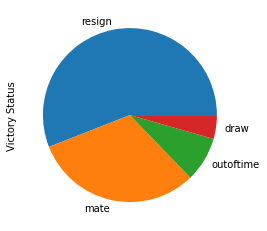

In [19]:
df['Victory Status'].value_counts().plot(kind = 'pie')
plt.show()

$ \rightarrow$ The overwhelming majority of wins is from resignations, followed by checkmates, time and draw.

In [20]:
df['Opening Eco'].nunique()

365

There are 365 unique codes recorded, which means that there are 365 different openings played in the 20000 games.

In [21]:
df['Opening Eco'].value_counts()

A00    948
C00    810
D00    701
B01    688
C41    650
      ... 
C32      1
A67      1
E18      1
D95      1
D19      1
Name: Opening Eco, Length: 365, dtype: int64

$\rightarrow$ The Polish Opening (A00) and its variations are played the most, with 948 games played, followed by the French Defence (C00) and Queen's Pawn Game.

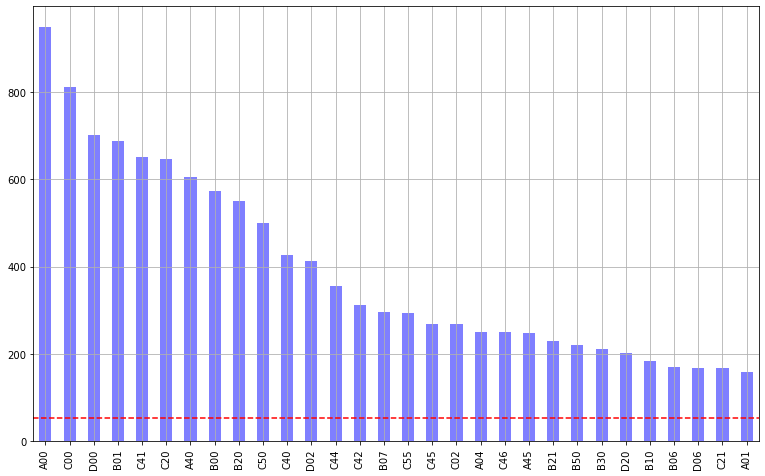

In [22]:
plt.figure(figsize = (13 , 8))
df['Opening Eco'].value_counts().head(30).plot.bar(grid = True, alpha = 0.5, color = 'b')
plt.axhline (df['Opening Eco'].value_counts().mean(), color = 'r', linestyle = '--')
plt.show()

In [23]:
df['Opening Name'].nunique()

1477

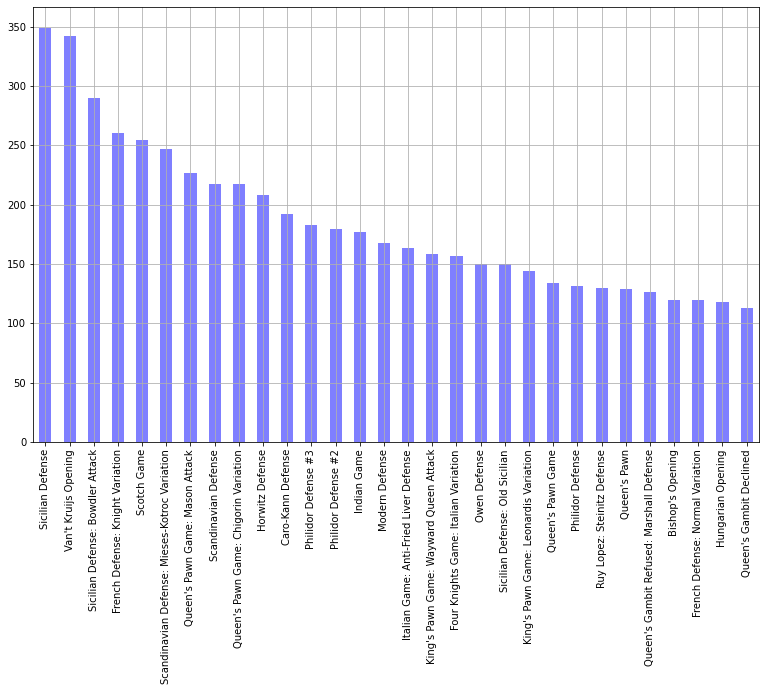

In [24]:
# The most popular opening variation
plt.figure (figsize = (13 , 8))
df['Opening Name'].value_counts().head(30).plot.bar(grid = True, alpha = 0.5, color = 'b')
plt.show()

Surprisingly, the most popular opening variation played is the standard Siciliant Defence while only the standard Queen's Pawn is only the $25^{th}$ most played opening variation.

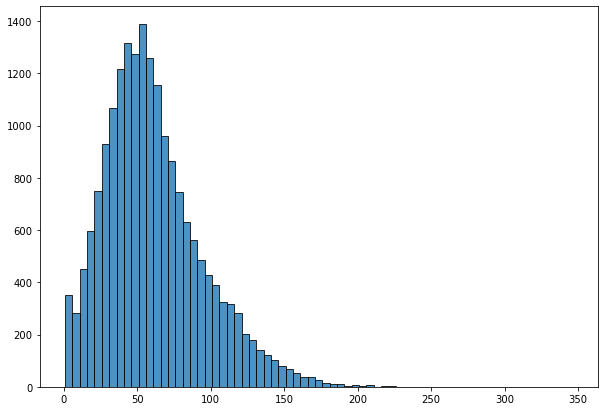

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure (figsize = (10 , 7))
plt.hist(df['Turns'] , bins= np.arange(df['Turns'].min(), df['Turns']. max(), 5),alpha = 0.8 , linewidth = 1 , edgecolor = 'k' )
plt.show()
plt.tight_layout()

The majority of matches contains around 50 turns.

In [26]:
df['Time Control'].nunique()

400

There are 400 kinds of time control in the recorded games. 

In [27]:
df['Time Control'].value_counts().head(20)

10+0     7356
15+0     1258
15+15     821
5+5       723
5+8       678
8+0       563
10+5      534
15+10     430
20+0      428
30+0      360
10+10     324
15+5      299
7+2       217
10+2      180
30+30     160
5+10      152
10+3      145
25+0      141
10+8      123
20+10     101
Name: Time Control, dtype: int64

Blitz and Rapid time controls are the most popular.

### Some Cross-column Analyses

In [28]:
# recording the elo difference between players
df['Elo Difference'] = df['White Rating'] - df['Black Rating']
df['Elo Difference'].mean()

7.254486475173965

In [29]:
print(len(df[df['Elo Difference'] > 250][df['Rated'] == True]) / len(df[df['Rated'] == True]))

0.10480377578069439


C:\Users\PV\AppData\Local\Temp\ipykernel_25104\214784688.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df['Elo Difference'] > 250][df['Rated'] == True]) / len(df[df['Rated'] == True]))


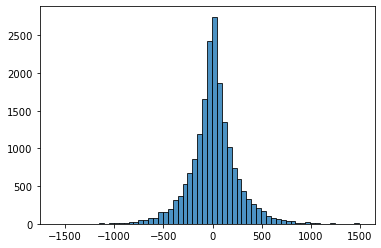

In [30]:
plt.hist(df['Elo Difference'] , bins= np.arange(df['Elo Difference'].min(), df['Elo Difference']. max(), 50),alpha = 0.8 , linewidth = 1 , edgecolor = 'k' )
plt.show()

Elo difference between the two players roughly follow a normal distribution with its base being 0 and the mean lies around 7. The ranked matches with elo difference greater than 250 is only 10% of the total number of rank match. This can be a indicator of the efficiency of lichess' (which is where this data come from) match-making algorithm.

In [31]:
df['Match Elo'] = (df['White Rating'] + df['Black Rating'])/2

In [39]:
newbie_mat = df[df['Match Elo'] < 1400]
inter_mat = df[(df['Match Elo'] >= 1400) & (df['Match Elo'] < 1800)]
adv_mat = df[df['Match Elo'] >= 1800]

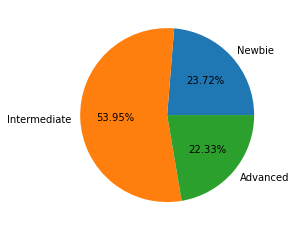

In [44]:
plt.pie([len(newbie_mat), len(inter_mat) , len(adv_mat)] , labels = ['Newbie' , 'Intermediate' , 'Advanced'], autopct= '%.2f%%')
plt.show()

This aligns with the expected distribution of matches with the majority being the in the intermediate level.

In [83]:
#comparing the stats between newbies and advanced players
newbie_mat.describe()

,Turns,White Rating,Black Rating,Opening Ply,Elo Difference,Match Elo
count,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000
mean,52.722259,1271.685418,1261.614163,3.865872,10.071255,1266.649790
std,32.113935,156.094973,157.537743,2.096021,233.053476,104.944794
min,1.000000,784.000000,789.000000,1.000000,-919.000000,816.500000
25%,29.000000,1169.000000,1163.000000,2.000000,-118.000000,1202.000000
50%,49.000000,1283.000000,1273.000000,4.000000,3.000000,1292.000000
75%,71.000000,1374.000000,1366.000000,5.000000,144.000000,1352.000000
max,209.000000,1916.000000,1793.000000,18.000000,1073.000000,1399.500000


In [85]:
inter_mat.describe()

,Turns,White Rating,Black Rating,Opening Ply,Elo Difference,Match Elo
count,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000
mean,61.095520,1587.543445,1581.071955,4.744957,6.471490,1584.307700
std,32.924787,162.545412,162.716189,2.568832,238.166083,110.761067
min,1.000000,846.000000,946.000000,1.000000,-1290.000000,1400.000000
25%,38.000000,1492.000000,1483.000000,3.000000,-99.000000,1493.500000
50%,56.000000,1572.000000,1567.000000,4.000000,2.000000,1574.500000
75%,79.000000,1698.000000,1692.000000,6.000000,112.000000,1676.500000
max,259.000000,2449.000000,2344.000000,28.000000,1492.000000,1799.500000


In [84]:
adv_mat.describe()

,Turns,White Rating,Black Rating,Opening Ply,Elo Difference,Match Elo
count,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000
mean,67.383786,1966.705014,1960.550375,5.995783,6.154639,1963.627694
std,34.578297,194.073983,188.158042,3.478075,281.906213,129.098031
min,1.000000,1016.000000,1122.000000,1.000000,-1605.000000,1800.000000
25%,43.000000,1845.000000,1839.000000,3.000000,-118.000000,1860.000000
50%,62.000000,1944.000000,1941.000000,5.000000,6.000000,1931.500000
75%,86.000000,2081.250000,2076.000000,8.000000,127.000000,2038.500000
max,349.000000,2700.000000,2723.000000,28.000000,1499.000000,2475.500000


Generally, an advanced match contains much more turns than a newbie match. Matches on a more advanced level also follow more 'opening plies' (essentially emulating the past moves of masters, grandmasters).

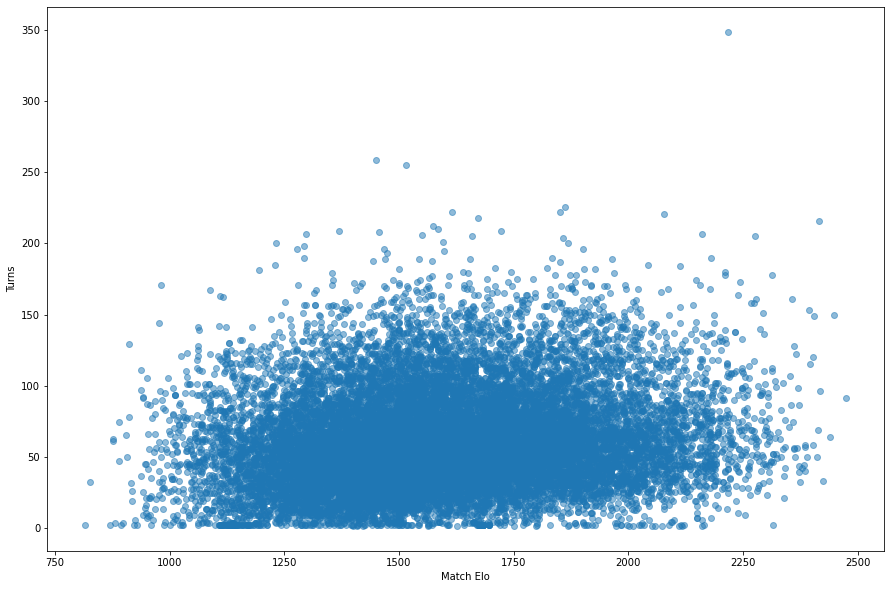

In [91]:
plt.figure(figsize =(15,10))
plt.scatter(df['Match Elo'], df['Turns'], alpha = 0.5, label = 'Match Elo - Turns Scatterplot')
plt.xlabel('Match Elo')
plt.ylabel ('Turns')
plt.show()

In [76]:
# the highest opening winrates ( although I do not understand why there are null values here)
x = df[df['Winner'] == 'white']['Opening Eco'].value_counts() / df['Opening Eco'].value_counts()
x.sort_values(ascending = False)

E98    1.0
E06    1.0
D95    1.0
D87    1.0
D86    1.0
      ... 
E46    NaN
E47    NaN
E48    NaN
E56    NaN
E72    NaN
Name: Opening Eco, Length: 365, dtype: float64

In [82]:
#the winrates of the 20 most popular openings
for i in df['Opening Eco'].value_counts().head(20).index:
    print(i , x[i])

A00 0.39451476793248946
C00 0.4962962962962963
D00 0.46790299572039945
B01 0.498546511627907
C41 0.5753846153846154
C20 0.4520123839009288
A40 0.5528052805280528
B00 0.5975609756097561
B20 0.3938294010889292
C50 0.452
C40 0.5971896955503513
D02 0.5121359223300971
C44 0.5154929577464789
C42 0.536741214057508
B07 0.5574324324324325
C55 0.5136054421768708
C45 0.5018587360594795
C02 0.4664179104477612
A04 0.552
C46 0.556


## Failed Attempts

In [62]:
# see which openings has the highest winrates
x = df['Opening Eco'].value_counts().head(20)
y = []
for i in x.index:
    y.append(df[df['Opening Eco'] == i]['Winner'].value_counts() )
#maybe I need to create a column that convert white - black win into binary then use sum() based on that value for this way to work?

In [61]:
y[1]

'blackblackblackblackblackblackwhiteblackblackwhiteblackwhiteblackblackblackwhitedrawwhiteblackblackblackwhitewhiteblackwhiteblackblackwhiteblackblackblackwhiteblackblackblackblackwhitewhitewhiteblackwhitewhiteblackblackblackblackwhitewhitewhitedrawblackwhiteblackdrawblackwhitedrawblackblackwhitewhiteblackwhitewhiteblackblackwhiteblackblackblackblackwhiteblackblackblackwhitewhiteblackblackblackwhitewhitedrawblackwhitewhiteblackwhitewhiteblackblackblackblackblackblackblackblackblackblackwhitewhitewhitewhitewhiteblackblackblackwhitewhitewhitewhitewhiteblackblackwhitewhiteblackwhiteblackwhiteblackwhitewhitewhiteblackwhiteblackwhitewhitewhitedrawblackblackwhiteblackblackdrawdrawwhiteblackwhiteblackwhiteblackwhiteblackblackblackblackwhitewhitewhiteblackwhiteblackwhiteblackwhitedrawwhitewhitewhitewhiteblackblackdrawwhitedrawblackwhiteblackblackblackwhitewhitedrawblackwhitewhiteblackwhitewhiteblackwhitedrawwhitewhitewhitewhitewhiteblackwhitewhitewhitewhitewhitewhitewhiteblackblackwhitewhitebl

In [ ]:
# I try to categorize the matches based on the elo of the two players
df['Match Level'] = pd.DataFrame([1 , len(df)])
df['Match Level'][df['Match Elo'] < 1200] = 'Newbie'
df['Match Level'][[(df['Match Elo'] >= 1200) & (df['Match Elo'] > 1500)]= 'Intermediate'
df['Match Level'][[df['Match Elo'] < 1200]] = 'Advanced'

SyntaxError: invalid syntax (1349293500.py, line 4)